## Tests for Chebyshev polynomials

> Construction of Chebyshev mesh and interpolation of functions by Chebyshev polynomials.

In [1]:
import sys
import time

import numpy as np
import matplotlib.pyplot as plt

sys.path.append('./../lib')
import cheb.cheb as ch
import cheb.utils as chu

### Construction of Chebyshev polynomials

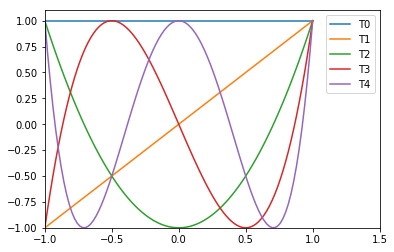

In [2]:
n = 5
x = np.array([
    np.linspace(-1., 1., 100)
])
T = chu.polynomial(n, x)

for i in range(n):
    plt.plot(x[0, :], T[i, 0, :], label='T%d'%i)
plt.xlim(-1., 1.5)
plt.ylim(-1., 1.1)
plt.legend(loc='best')
plt.show()

### Construction of Chebyshev polynomial's derivatives

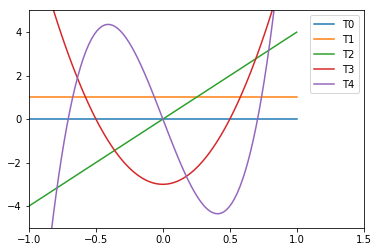

In [3]:
n = 5
x = np.array([
    np.linspace(-1., 0.999, 100)
])
T = chu.polynomial_der(n, x)

for i in range(n):
    plt.plot(x[0, :], T[i, 0, :], label='T%d'%i)
plt.xlim(-1., 1.5)
plt.ylim(-5., 5.)
plt.legend(loc='best')
plt.show()

### Mesh construction

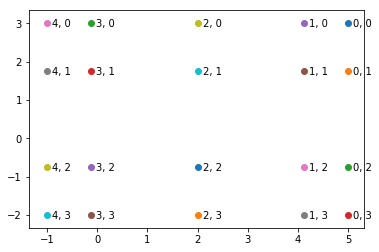

In [4]:
n = [5, 4]
l = [
    [-1., 5.],
    [-2., 3.]
]

for i in range(n[0]):
    for j in range(n[1]):
        ind = [i, j]
        x = chu.point(ind, n, l)
        plt.scatter(x[0], x[1])
        plt.text(x[0]+0.1, x[1]-0.1, '%d, %d'%(ind[0], ind[1]))
plt.show()

### Interpolation of 1D functions (all together)

$$
y_1 = x + \sin{x},
$$

$$
y_2 = x^2 + \cos{x},
$$

$$
y_3 = x^3 + e^{-x}.
$$

In [5]:
def func0(x):
    return x + np.sin(x)

def func1(x):
    return x**2 + np.cos(x)

def func2(x):
    return x**3 + np.exp(-x)

_t = time.time()

n = np.array([200])
l = np.array([[-1., 3.]])

Y = np.zeros((n[0], 3))
for i in range(n[0]):
    ind = np.array([i])
    x = chu.point(ind, n, l)
    Y[i, 0] = func0(x)
    Y[i, 1] = func1(x)
    Y[i, 2] = func2(x)
    
A = chu.interpolate_1d(Y)

X = np.array([[-0.5, -1., 0.2, 1., 1.5, 2.5]])  # Check of result

print('Maximum relative errors of results on check mesh:')
print('Func.1 : %-8.2e'%np.max(np.abs((ch.calc(X, A[:, 0], l) - func0(X)) / func0(X))))
print('Func.2 : %-8.2e'%np.max(np.abs((ch.calc(X, A[:, 1], l) - func1(X)) / func1(X))))
print('Func.3 : %-8.2e'%np.max(np.abs((ch.calc(X, A[:, 2], l) - func2(X)) / func2(X))))
print('----------------------')
print('Total time %6.3f sec. '%(time.time() - _t))

Maximum relative errors of results on check mesh:
Func.1 : 1.47e-15
Func.2 : 1.52e-15
Func.3 : 5.24e-15
----------------------
Total time  0.045 sec. 


### Interpolation of 1D function

In [6]:
def func(x):
    return np.sin(x[0, ])

_t = time.time()

n = np.array([40])
l = np.array([
    [-1., 2.]
])

Y = np.zeros(n)
for ind, v in np.ndenumerate(Y): Y[ind] = func(chu.point(np.array(ind), n, l))
    
A = ch.prep(Y)

print('---------------------- Interpolation 1D')
print('Total time %6.3f sec. '%(time.time() - _t))

_t = time.time()

a, b = -1., 2.
X = a + np.random.random((1, 100))*(b - a)
f_real = func(X)
f_calc = ch.calc(X, A, l)

err = np.max(np.abs((f_calc-f_real) / f_real))

print ('---------------------- Calculation 1D')
print('Maximum relative error of results on check mesh: %-8.2e'%err) 
print('Total time %6.3f sec. '%(time.time() - _t))

---------------------- Interpolation 1D
Total time  0.005 sec. 
---------------------- Calculation 1D
Maximum relative error of results on check mesh: 2.86e-14
Total time  0.040 sec. 


### Interpolation of 2D function

In [7]:
def func(x):
    return 7. + x[0, ]**2 + np.exp(-x[1, ])

_t = time.time()

n = np.array([40, 30])
l = np.array([
    [-1., 2.],
    [-4., 1.]
])

Y = np.zeros(n)
for ind, v in np.ndenumerate(Y): Y[ind] = func(chu.point(np.array(ind), n, l))
    
A = ch.prep(Y)

print('---------------------- Interpolation 2D')
print('Total time %6.3f sec. '%(time.time() - _t))

_t = time.time()

a, b = -1., 1.
X = a + np.random.random((2, 10))*(b - a)
f_real = func(X)
f_calc = ch.calc(X, A, l)

err = np.max(np.abs((f_calc-f_real) / f_real))

print ('---------------------- Calculation 2D')
print('Maximum relative error of results on check mesh: %-8.2e'%err) 
print('Total time %6.3f sec. '%(time.time() - _t))

---------------------- Interpolation 2D
Total time  0.060 sec. 
---------------------- Calculation 2D
Maximum relative error of results on check mesh: 3.49e+00
Total time  0.011 sec. 


### Interpolation of 3D function:

In [8]:
def func(x):
    return 7. + x[0, ]**2 + 2.*x[1, ]**2 + 2.*x[2, ]

_t = time.time()

n = np.array([5, 5, 8])
l = np.array([
    [-1., 2.],
    [-4., 1.],
    [-3., 2.]
])

Y = np.zeros(n)
for ind, v in np.ndenumerate(Y): Y[ind] = func(chu.point(np.array(ind), n, l))

A = ch.prep(Y)

print('---------------------- Interpolation 3D')
print('Total time %6.3f sec. '%(time.time() - _t))

_t = time.time()

a, b = -1., 1.
X = a + np.random.random((3, 10))*(b - a)
f_real = func(X)
f_calc = ch.calc(X, A, l)

err = np.max(np.abs((f_calc-f_real) / f_real))

print ('---------------------- Calculation 3D')
print('Maximum relative error of results on check mesh: %-8.2e'%err) 
print('Total time %6.3f sec. '%(time.time() - _t))

---------------------- Interpolation 3D
Total time  0.017 sec. 
---------------------- Calculation 3D
Maximum relative error of results on check mesh: 4.04e+00
Total time  0.003 sec. 


### Interpolation of 4D function

In [9]:
def func(x):
    return 7. + x[0, ]**2 + np.exp(-x[1, ]) + np.sin(x[2, ]) + x[3, ]**3

_t = time.time()

n = np.array([5, 4, 6, 3])
l = np.array([
    [-1., 2.],
    [-4., 1.],
    [-3., 2.],
    [-1., 1.]
])

Y = np.zeros(n)
for ind, v in np.ndenumerate(Y):
    Y[ind] = func(chu.point(np.array(ind), n, l))

A = ch.prep(Y)

print('---------------------- Interpolation 4D')
print('Total time %6.3f sec. '%(time.time() - _t))

_t = time.time()

a, b = -1., 1.
X = a + np.random.random((4, 10))*(b - a)
f_real = func(X)
f_calc = ch.calc(X, A, l)

err = np.max(np.abs((f_calc-f_real) / f_real))

print ('---------------------- Calculation 4D')
print('Maximum relative error of results on check mesh: %-8.2e'%err) 
print('Total time %6.3f sec. '%(time.time() - _t))

---------------------- Interpolation 4D
Total time  0.022 sec. 
---------------------- Calculation 4D
Maximum relative error of results on check mesh: 2.40e+00
Total time  0.004 sec. 
